In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the CSV file
file_path = 'spam.csv'
spam_df = pd.read_csv(file_path, encoding='latin-1')

# Rename the columns for clarity
spam_df = spam_df.rename(columns={'v1': 'label', 'v2': 'message'})

# Drop unnecessary columns
spam_df = spam_df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Encode labels
label_encoder = LabelEncoder()
spam_df['label'] = label_encoder.fit_transform(spam_df['label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(spam_df['message'], spam_df['label'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

# Predict the labels on the test set
y_pred = nb_classifier.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 0.9838565022421525
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



<ipython-input-2-82a4a5aacd93>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')
<ipython-input-2-82a4a5aacd93>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette='viridis')


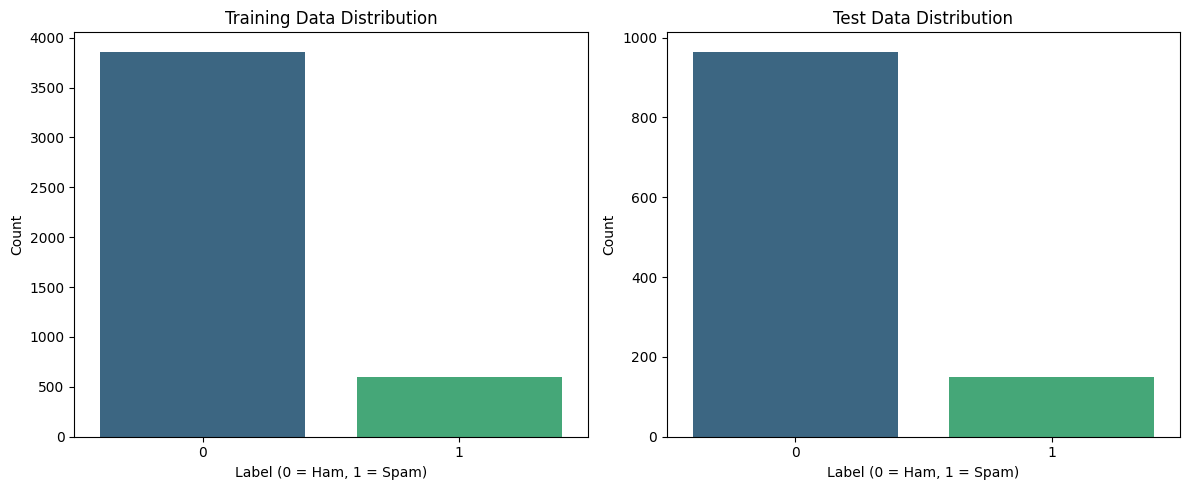

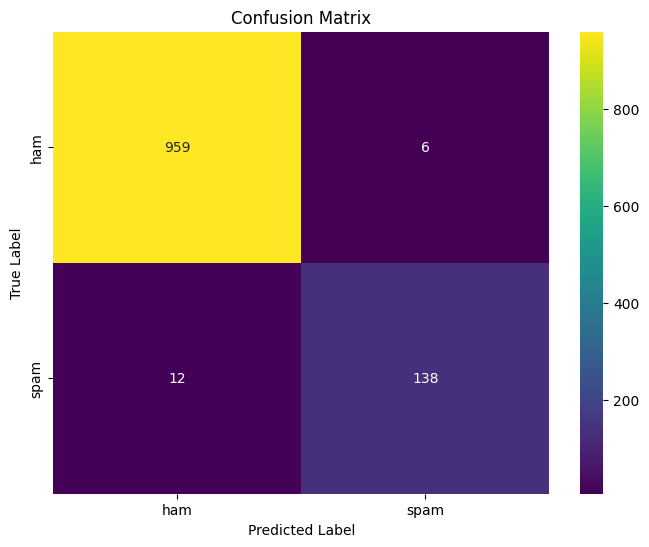

Accuracy: 0.9838565022421525


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot the distribution of labels in the training and test sets
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette='viridis')
plt.title('Training Data Distribution')
plt.xlabel('Label (0 = Ham, 1 = Spam)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x=y_test, palette='viridis')
plt.title('Test Data Distribution')
plt.xlabel('Label (0 = Ham, 1 = Spam)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Display accuracy
print(f'Accuracy: {accuracy}')
